In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## Original dataset - Introduction

- `train_essays.csv`: The training set with essays written by students and a few examples of LLM-generated essays.
- `test_essays.csv`: The test set with essays for which we need to predict whether they were generated by an LLM.
- `train_prompts.csv`: The prompts used to generate the essays, containing both the instructions and source texts.

In [3]:
# Define file paths
train_essays_path = '../data/original/train_essays.csv'
test_essays_path = '../data/original/test_essays.csv'
train_prompts_path = '../data/original/train_prompts.csv'

# Load the data
train_essays_df = pd.read_csv(train_essays_path)
test_essays_df = pd.read_csv(test_essays_path)
train_prompts_df = pd.read_csv(train_prompts_path)

In [4]:
# Display the few rows of the training essays
train_essays_df.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [5]:
# Display the few rows of the test essays
test_essays_df.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [6]:
# Display rows of the train_prompts
train_prompts_df

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


## Original dataset - Exploratory Data Analysis (EDA)

In [7]:
# Check for missing values in the original dataset
missing_values_train = train_essays_df.isnull().sum()
print("missing_values_train:", missing_values_train)
missing_values_test = test_essays_df.isnull().sum()
print("\nmissing_values_test:", missing_values_test)
missing_values_prompts = train_prompts_df.isnull().sum()
print("\nmissing_values_prompts:", missing_values_prompts)

missing_values_train: id           0
prompt_id    0
text         0
generated    0
dtype: int64

missing_values_test: id           0
prompt_id    0
text         0
dtype: int64

missing_values_prompts: prompt_id       0
prompt_name     0
instructions    0
source_text     0
dtype: int64


In [8]:
def add_value_label(plt, x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i], (i, y_list[i]), ha="center")

def show_bar_graph(labels, values, title, ylabel):
    plt.bar(labels, values, color=["coral", "lightgreen"])
    add_value_label(plt, labels, values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

In [9]:
df_ai = train_essays_df[train_essays_df["generated"] == 1]
df_human = train_essays_df[train_essays_df["generated"] == 0]

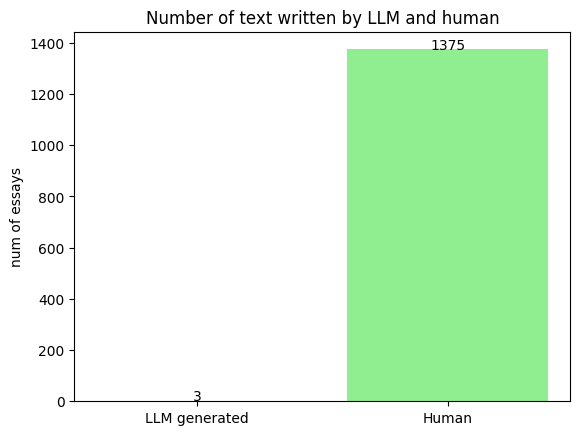

In [11]:
# Distribution of essays written by AI and human
labels = ['LLM generated', 'Human']
values = [len(df_ai), len(df_human)]

show_bar_graph(labels, values, "Number of text written by LLM and human", "num of essays")

The train_essays_df DataFrame reveals a highly imbalanced distribution with 1,375 student-written essays (label '0') and only 3 LLM-generated essays (label '1').

## DAIGT_V2 dataset - Introduction
* Since the original dataset given by the competition had very few number of data points and was highly imbalanced, DAIGT_V2 external dataset is chosen to tackle those problems.
- Link to the DAIGT_V2 on Kaggle: https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset

- `train_v2_drcat_02.csv`: The training set with essays written by students and LLM-generated.

In [13]:
# Define file path
daigt_train_essays_path = '../data/DAIGT_V2/train_v2_drcat_02.csv'

# Load the data
df_daigt_train = pd.read_csv(daigt_train_essays_path)

In [14]:
# Display the few rows of the training essays
df_daigt_train.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [15]:
# Display overall information about the dataset
df_daigt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


The dataset has 44868 rows and 5 columns.
* text: essay by student or machine
* label: 0 for humans, 1 for machine
* prompt_name: original persuade prompta
* source: source dataset
* RDizzl3_seven: Is from "7 Prompts training dataset" or not? refer to:https://www.kaggle.com/competitions/llm-detect-ai-generated-text/discussion/453410

## DAIGT_V2 dataset - Exploratory Data Analysis (EDA)

In [16]:
# Check for missing values in the DAIGT_V2 dataset
missing_values_train = df_daigt_train.isnull().sum()
print("missing_values_train:", missing_values_train)

missing_values_train: text             0
label            0
prompt_name      0
source           0
RDizzl3_seven    0
dtype: int64


In [19]:
# Check for duplicated data
df_daigt_train.duplicated().any()

False

In [20]:
df_daigt_ai = df_daigt_train[df_daigt_train["label"] == 1]
df_daigt_human = df_daigt_train[df_daigt_train["label"] == 0]

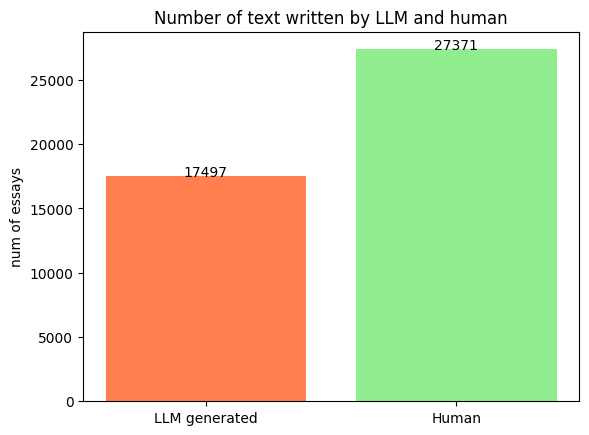

In [21]:
# Distribution of essays written by AI and human
labels = ['LLM generated', 'Human']
values = [len(df_daigt_ai), len(df_daigt_human)]

show_bar_graph(labels, values, "Number of text written by LLM and human", "num of essays")

As we can see from the graph, although the distribution of essays is still slightly skewed to "Human written" essays, we got a more balanced one compared to what we had from the "Original dataset".

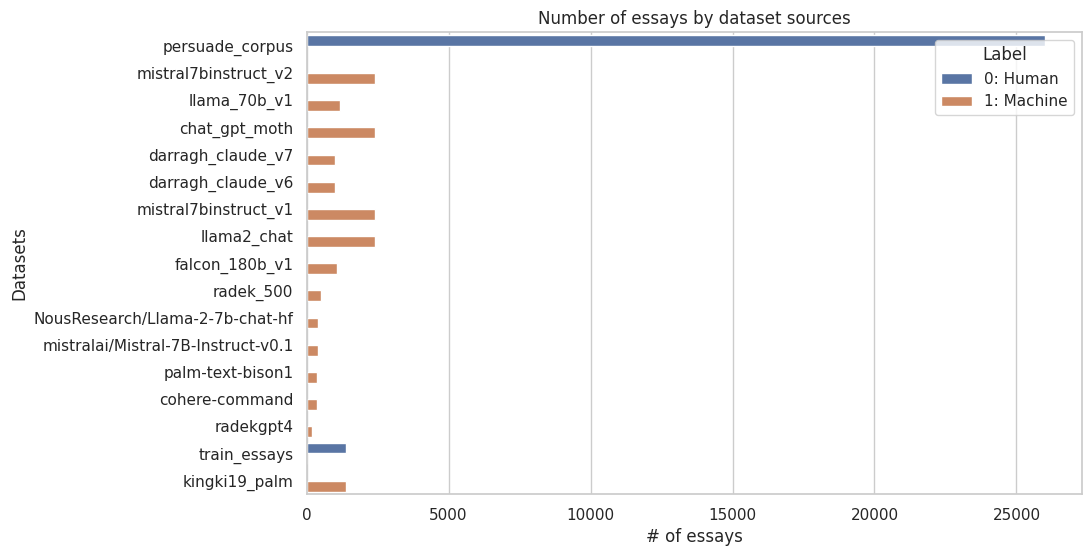

In [117]:
# Plot total number of essays distributed by each dataset sources of DAIGT_V2
plt.figure(figsize=(10,6))
sns.countplot(y='source', data=df_daigt_train, hue="label")
plt.title("Number of essays by dataset sources")
plt.ylabel("Datasets")
plt.xlabel("# of essays")
plt.legend(title='Label', loc='upper right', labels=['0: Human', '1: Machine'])
plt.show()

- The "persuade_corpus" dominates others in the number of essays. It should be noted that this dataset source contains 25,000 argumentative essays produced by 6th-12th grade students, without any LLM-generated essays.

- The "train_essays" is the original dataset we mentioned above.

- Other dataset sources contain essays generated by different LLMs.

Link to "persuade corpus 2.0" dataset: https://www.kaggle.com/datasets/nbroad/persaude-corpus-2/

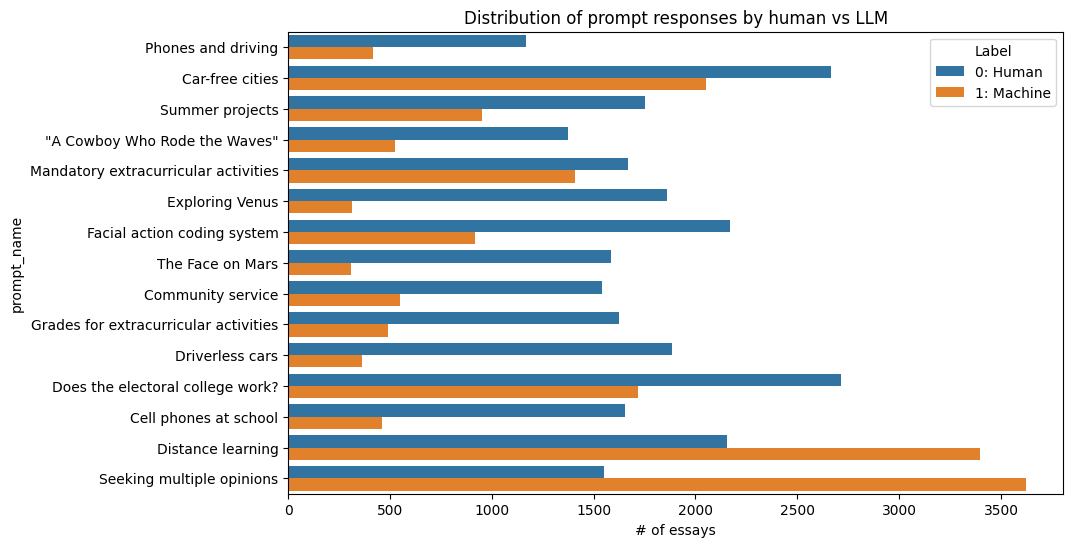

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df_daigt_train, y="prompt_name", hue="label")
plt.title("Distribution of prompt responses by human vs LLM")
plt.xlabel("# of essays")
plt.legend(title='Label', loc='upper right', labels=['0: Human', '1: Machine'])
plt.show()

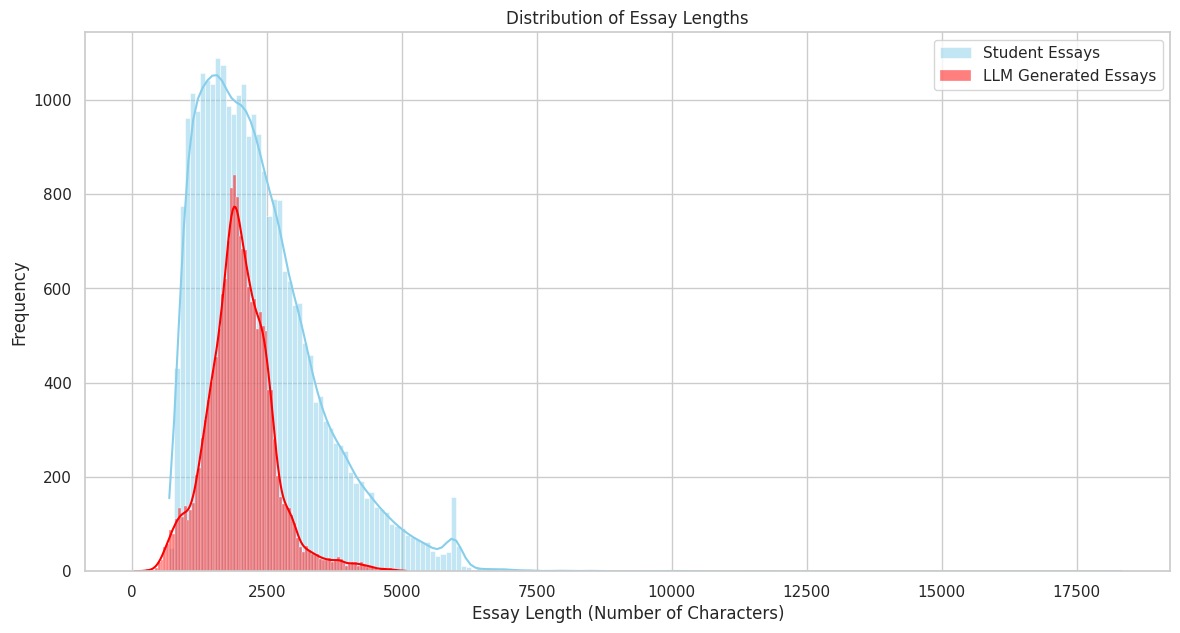

In [51]:
#Plot the essay lengths of human vs LLM 
df_daigt_train['essay_length'] = df_daigt_train['text'].apply(len)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Distribution of essay lengths for student essays
sns.histplot(df_daigt_train[df_daigt_train['label'] == 0]['essay_length'], color="skyblue", label='Student Essays', kde=True)

# Distribution of essay lengths for LLM generated essays
sns.histplot(df_daigt_train[df_daigt_train['label'] == 1]['essay_length'], color="red", label='LLM Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Essay length varies widely for students and is typically longer than LLM-generated essays.

## Preprocessing and clean data

In [68]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Step 1: Remove HTML tags
def remove_html_tags(text):
    bsoup = BeautifulSoup(text, "html.parser")
    return bsoup.get_text()

# Step 2: Convert multiple whitespace characters to a single space
def remove_multiple_whitespace_chars(text):
    return re.sub(r'\s+', ' ', text)

# Step 3: Remove content between square brackets
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Step 4: Remove special characters
def remove_special_chars(text):
    return re.sub('[^a-zA-z0-9\s]', '', text)

# Step 5: Removing stop words
def remove_stop_words(text):
    text = text.strip().lower() #strip whitespaces and make all lowercase
    word_tokens = word_tokenize(text)
    tokens_wo_stopwords = [token for token in word_tokens if token not in stop_words]
    text_wo_stopwords = ' '.join(tokens_wo_stopwords)
    return text_wo_stopwords

# Combine all into one preprocessing function
def preprocess(text):
    text = remove_html_tags(text)
    text = remove_multiple_whitespace_chars(text) # Ensure this step is included
    text = remove_square_brackets(text)
    text = remove_special_chars(text)
    text = remove_stop_words(text)
    return text


[nltk_data] Downloading package punkt to /home/trungnqcs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/trungnqcs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
########################## Statistics BEFORE preprocessing data ##########################

# Get lists of human vs LLM essays BEFORE preprocessing
human_essays = df_daigt_human['text'].str.lower().tolist()
llm_essays = df_daigt_ai['text'].str.lower().tolist()

# Get lists of human vs LLM essays tokens BEFORE preprocessing
human_tokens_before_preprocessing = [nltk.word_tokenize(essay) for essay in human_essays]
human_tokens_before_preprocessing = [w for doc in human_tokens_before_preprocessing for w in doc]

llm_tokens_before_preprocessing = [nltk.word_tokenize(essay) for essay in llm_essays]
llm_tokens_before_preprocessing = [w for doc in llm_tokens_before_preprocessing for w in doc]

# Get human vs LLM vocab BEFORE preprocessing
human_vocab_before_preprocessing = set(human_tokens_before_preprocessing)
llm_vocab_before_preprocessing = set(llm_tokens_before_preprocessing)

print("--------------- BEFORE preprocessing ---------------")
print("Number of tokens of HUMAN WRITTEN essays: ", len(human_tokens_before_preprocessing))
print("Number of tokens of LLM GENERATED essays: ", len(llm_tokens_before_preprocessing))
print("Length of HUMAN WRITTEN essays vocabulary: ", len(human_vocab_before_preprocessing))
print("Length of LLM GENERATED essays vocabulary: ", len(llm_vocab_before_preprocessing))


# ########################## Statistics AFTER preprocessing data ##########################

# Get lists of human vs LLM essays tokens AFTER preprocessing
human_tokens_after_preprocessing = [nltk.word_tokenize(preprocess(essay)) for essay in human_essays]
human_tokens_after_preprocessing = [w for doc in human_tokens_after_preprocessing for w in doc]

llm_tokens_after_preprocessing = [nltk.word_tokenize(preprocess(essay)) for essay in llm_essays]
llm_tokens_after_preprocessing = [w for doc in llm_tokens_after_preprocessing for w in doc]

# Get human vs LLM vocab AFTER preprocessing
human_vocab_after_preprocessing = set(human_tokens_after_preprocessing)
llm_vocab_after_preprocessing = set(llm_tokens_after_preprocessing)

print("\n\n--------------- AFTER preprocessing ---------------")
print("Number of tokens of HUMAN WRITTEN essays: ", len(human_tokens_after_preprocessing))
print("Number of tokens of LLM GENERATED essays: ", len(llm_tokens_after_preprocessing))
print("Length of HUMAN WRITTEN essays vocabulary: ", len(human_vocab_after_preprocessing))
print("Length of LLM GENERATED essays vocabulary: ", len(llm_vocab_after_preprocessing))

--------------- BEFORE preprocessing ---------------
Number of tokens of HUMAN WRITTEN essays:  12634737
Number of tokens of LLM GENERATED essays:  6544421
Length of HUMAN WRITTEN essays vocabulary:  79760
Length of LLM GENERATED essays vocabulary:  26464


--------------- AFTER preprocessing ---------------
Number of tokens of HUMAN WRITTEN essays:  5715888
Number of tokens of LLM GENERATED essays:  3135806
Length of HUMAN WRITTEN essays vocabulary:  84092
Length of LLM GENERATED essays vocabulary:  25338


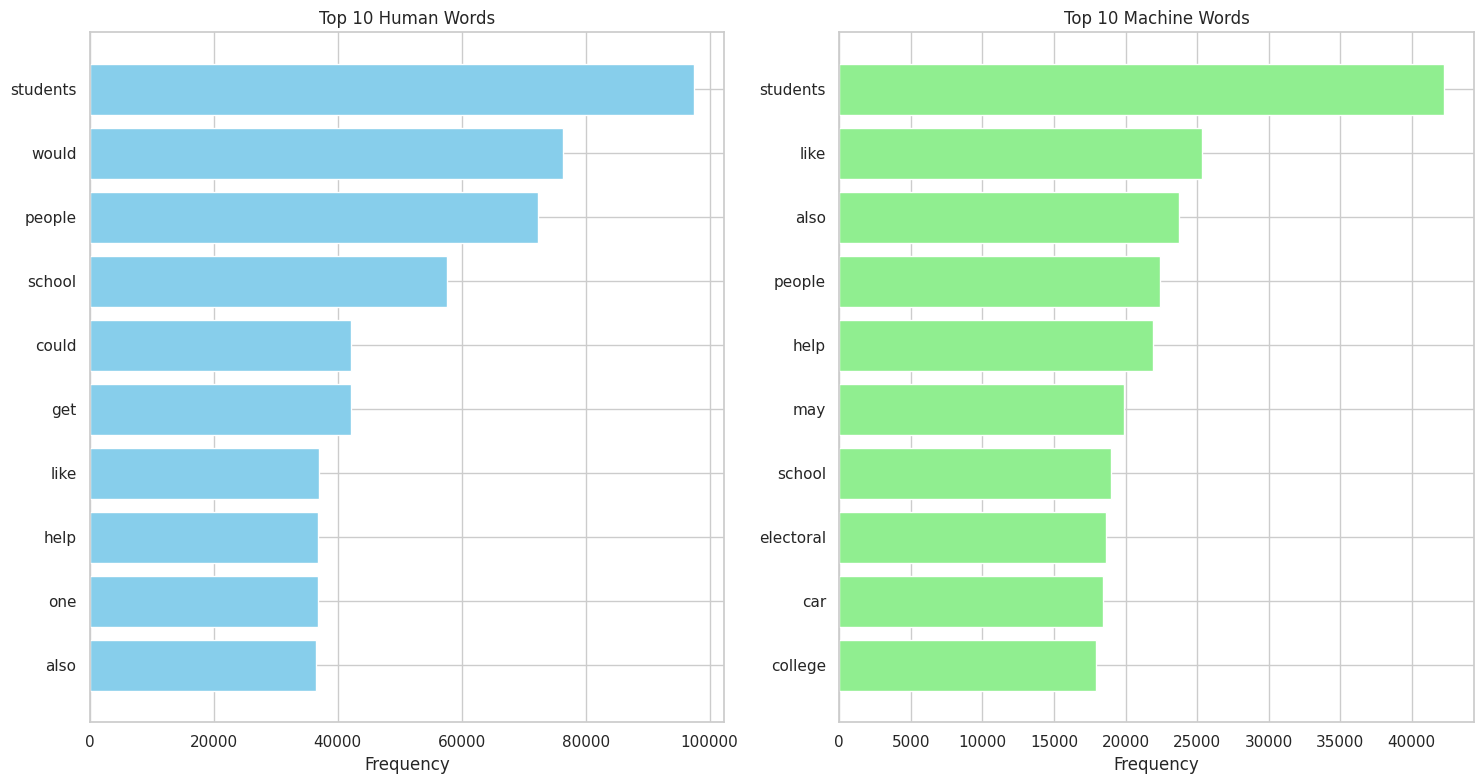

In [64]:
from collections import Counter

top_10_human = Counter(human_tokens_after_preprocessing).most_common(10)
top_10_machine = Counter(llm_tokens_after_preprocessing).most_common(10)

# Separate words and counts for human and machine
human_words, human_counts = zip(*top_10_human)
machine_words, machine_counts = zip(*top_10_machine)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Human bar chart
axs[0].barh(human_words, human_counts, color='skyblue')
axs[0].set_title('Top 10 Human Words')
axs[0].set_xlabel("Frequency")
axs[0].invert_yaxis()

# Machine bar chart
axs[1].barh(machine_words, machine_counts, color='lightgreen')
axs[1].set_title('Top 10 Machine Words')
axs[1].set_xlabel("Frequency")
axs[1].invert_yaxis()

# Layout adjustments
plt.tight_layout()
plt.savefig('top10.png')


In [67]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(corpus, n=None, n_grams=2):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 10 bigrams in the human written essays
top_bigrams_prompts = get_top_n_grams(df_daigt_human['text'], n=10, n_grams=2)

# Get the top 10 bigrams in the LLM generated essays
top_bigrams_essays = get_top_n_grams(df_daigt_ai['text'], n=10, n_grams=2)

# Display the top bigrams
print("Top 10 Bigrams in Human Written Essays:")
for bigram, freq in top_bigrams_prompts:
    print(f"{bigram}: {freq}")

print("\nTop 10 Bigrams in LLM Generated Essays:")
for bigram, freq in top_bigrams_essays:
    print(f"{bigram}: {freq}")

Top 10 Bigrams in Human Written Essays:
electoral college: 18663
community service: 8034
driverless cars: 7814
cell phones: 7225
car usage: 5696
summer projects: 5608
popular vote: 5429
united states: 4592
student designed: 4343
cell phone: 4225

Top 10 Bigrams in LLM Generated Essays:
electoral college: 15510
car usage: 14301
limiting car: 10432
popular vote: 7448
united states: 3652
high school: 3618
traffic congestion: 3601
positive attitude: 3274
public transportation: 3243
help reduce: 3040


## Initial experimentation and results

### Clustering

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Function to preprocess text data
def preprocess_text(text):
    # Lowercase, remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Preprocess the essays
df_daigt_train['preprocessed_text'] = df_daigt_train['text'].apply(preprocess_text)

# Vectorize the essays
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_daigt_train['preprocessed_text'])

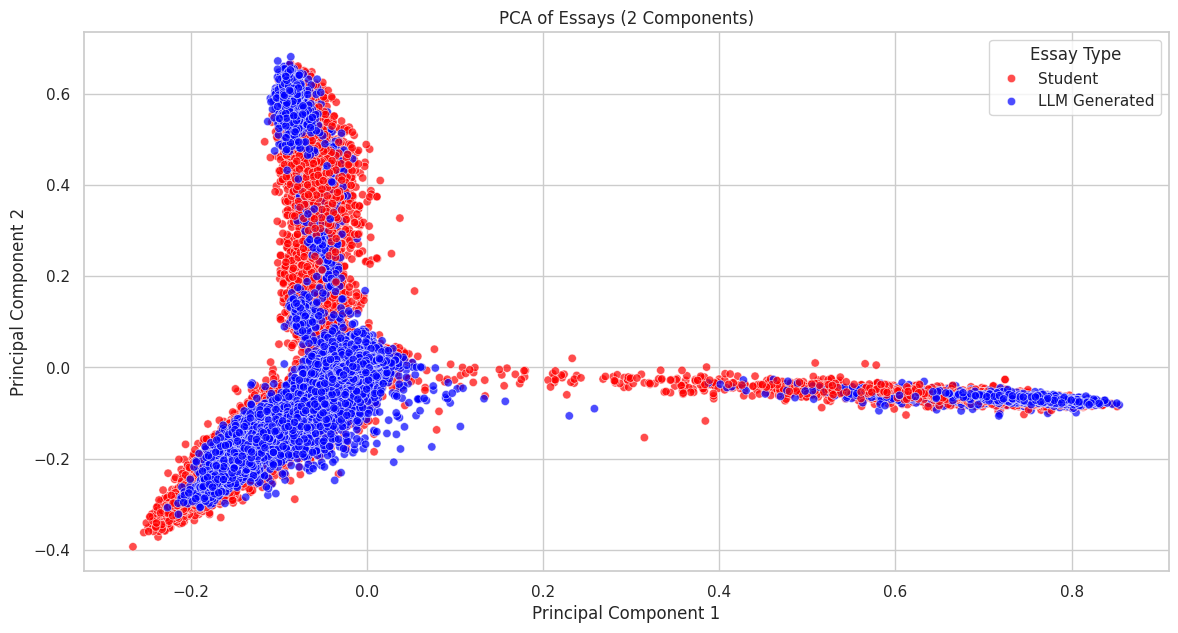

In [113]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_X_sample = pca.fit_transform(tfidf_matrix.toarray())  # Replace with actual TF-IDF matrix

# Add the PCA results to the dataframe
pca_df = pd.DataFrame(reduced_X_sample, columns=['PC1', 'PC2'])
pca_df['generated'] = df_daigt_train['label']

# Custom palette for plotting
custom_palette = {0: "red", 1: "blue"}
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='PC1', y='PC2', hue='generated', data=pca_df, 
    palette=custom_palette, alpha=0.7
)
plt.title('PCA of Essays (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Student', 'LLM Generated'], title='Essay Type')

plt.show()

- After preprocessing the text of DAIGT_V2 dataset, we use TF-IDF to extract features (max_features=2000). And then use them to plot PCA graph.

- PCA (2 components) visualization shows that LLM-generated essays blend in with the students' essays with large portions. This indicates that with TF-IDF feature extraction alone, it wouldn't be enough for us to classify Human vs LLM-generated essays effectively. Therefore, it is  necessary that we experiment with advanced techniques like text embeddings extracted from pre-trained language models, as this may reveal much more meaningful semantic insights.

## Modelling

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Use TF-IDF to extract features
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_daigt_train['preprocessed_text'])
y = df_daigt_train['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [108]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5481
           1       0.96      0.89      0.93      3493

    accuracy                           0.94      8974
   macro avg       0.95      0.93      0.94      8974
weighted avg       0.95      0.94      0.94      8974



- We got fairly good results after using the Multinomial Naive Bayes algorithm on the TF-IDF features. However, to reveal its performance on unseen data, we will submit our model for testing against the competition's hidden dataset in future works.